<a href="https://colab.research.google.com/github/sanganalasya-hash/Data-Science/blob/main/Unit2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U2proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU2proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Anything that can be looked at as either being yes or no, success or faliure, can be modeled with the betabinomial model. Examples: BAP3 introduces the betabinomial model with coin flipping, and Richard McElreath starts with guessing the proportion of surface water covering a planet in his book Statistical Rethinking.

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

-  Use your best idea now; you could use the same context the whole course and learn everything you need to know. Its more than ok to use the same context, or even some of the same data, from unit to unit.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit2NotesAK *is* your example! You are expected to be somewhere between a half and a quarter as detailed--but more is always welcome.

**PROJECT**

In [ ]:
!pip install preliz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
#We'll also need to re-import those libraries

import preliz as pz

In [ ]:
#These libraries don't need to be reinstalled each time, but they will need to be
#re-imported each time

import numpy as np
import arviz as az
import pymc as pm

**Question:** What is the probability that Austinites have a stronger preference for New York Style Pizza or Chicago Style Pizza as measures by online reviews?


**Prior**

Taking data of 25 pizza restraunts across Austin and evaluating the amount of good ratings (4-5 stars) out of the total number of ratings, we can estimate our question.

I defined a “good” restaurant as one where at least 70% of reviews were 4 or 5 stars. This threshold allowed me to identify which restaurants were more consistently liked.

<Axes: >

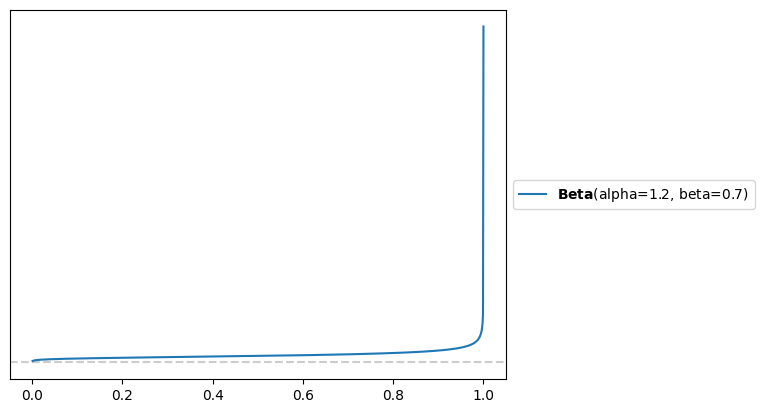

In [ ]:
#plotting the beta distribution with shape parameter 15 and scale parameter 12
pz.Beta(alpha=1.2,beta=.7).plot_pdf()

In [ ]:
#store the prior distribution for the Free Throw (FT) percentage
FT_prior = pz.Beta(alpha=2,beta=4)

#preliz used to not have a function that returns the mode
#it does now, but I left this formula here anyway, because I find it fun
FT_prior_mode = (FT_prior.alpha - 1)/(FT_prior.alpha + FT_prior.beta - 2)

#the mean mean first, then median, and finally mode
FT_prior.mean(), FT_prior.median(), FT_prior_mode

(np.float64(0.3333333333333333), 0.31381017045569726, np.float64(0.25))

In [ ]:
FT_data_2324 = np.repeat([1,0], repeats = [12,7])

In [ ]:
with pm.Model() as wmby_FT_2324_model:
  #same prior from before based on Euroleague data
  θ = pm.Beta('θ' , alpha = 1.2 , beta =.7)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_FT_2324 = pm.sample(2000)

Output()

<Axes: title={'center': 'θ'}>

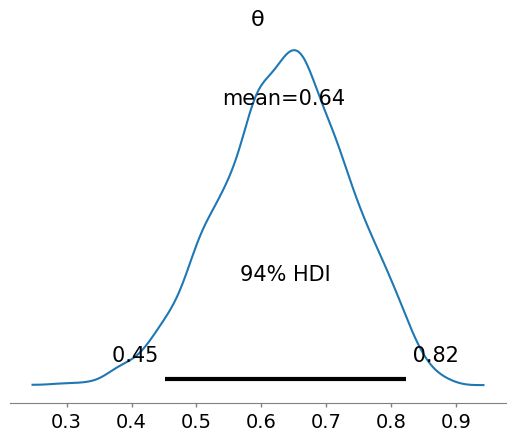

In [ ]:
#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(idata_FT_2324)

**Write-Up**

For my dataset, I looked at Austin pizza restaurants labeled as either New York–style or Chicago–style.  
For each restaurant I counted:
- Total number of reviews  
- Number of “good” reviews (4–5 stars)  

From these counts I calculated the proportion of good reviews.

Because each review can be thought of as a “success” or “failure”, this situation can use a Beta–Binomial model

I researched 25 total restraunts in Austin. I had 15 NY style restraunts and 10 CH style restraunts, so having a greater amount of NY style restraunts might have affected the results.

From my dataset of Austin pizza restaurants, I found:

*   Total “good” restaurants (≥70% good reviews): 19
*   Number of those that are New York–style: 12
*   Number that are Chicago–style: 7


To analyze this question, I used a Bayesian Beta–Binomial model, and
  I used a prior of (1.2, 0.7) . This prior puts a little extra weight toward New York–style being more common, compared to a uniform prior.  

The model suggests that New York–style pizza is more preferred among in top-rated Austin pizza restaurants, with an estimated probability of 64%. However, the interval is uncertain due to the relatively small sample size (only 19 “successful” restaurants) and only 25 restraunts in total. Additionally, there was likely bias from the ratings being purely derived from online data, which doeesn't perfectly represent all Austinites, and using sites like Yelp.

In other words, the evidence shows that Austinites favoring New York–style pizza, but the strength of that conclusion is very limited by the type and amount of data I collected.